In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns

event_type = data['CASE_OUTCOME'].str.split(', ').explode()
event_type = event_type.str.strip()

event_count = event_type.value_counts()

print(event_count)

CASE_OUTCOME
Other Serious or Important Medical Event    114536
Hospitalization                              35980
Visited a Health Care Provider               34502
Other Outcome                                34327
Death                                        24156
Visited Emergency Room                       20878
Other Serious Outcome                        10839
Life Threatening                              8931
Disability                                    7095
Required Intervention                         3210
Allergic Reaction                              370
Congenital Anomaly                             172
Injury                                           3
Name: count, dtype: int64


(Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Frequency of different ages'))

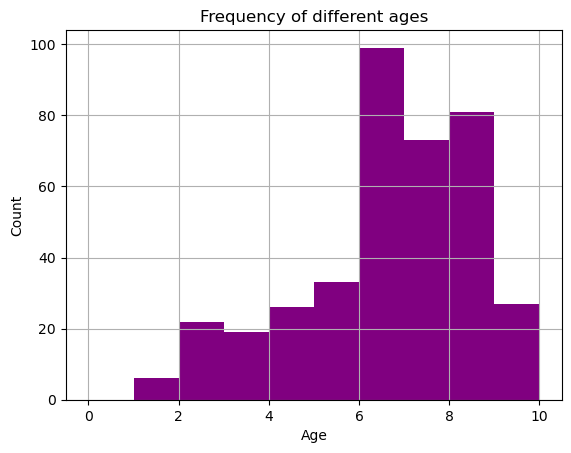

In [299]:
death_df["PATIENT_AGE"].hist(bins=10, color="purple", range=(0, 10));
plt.xlabel("Age"), plt.ylabel("Count"), plt.title("Frequency of different ages")

In [300]:
#death_df['AGE_UNITS'].unique()

#cleaning ages:
def years(row):
    if row['AGE_UNITS'] == 'days(s)':
        return row['PATIENT_AGE']/365
    elif row['AGE_UNITS'] == 'decade(s)':
        return row['PATIENT_AGE']*10
    elif row['AGE_UNITS'] == 'week(s)':
        return row['PATIENT_AGE']/52
    elif row['AGE_UNITS'] == 'days(s)':
        return row['PATIENT_AGE']/365
    elif row['AGE_UNITS'] == 'month(s)':
        return row['PATIENT_AGE']/12
    else:
        return row['PATIENT_AGE']

death_df_clean = death_df.copy(deep = True)
death_df_clean = death_df_clean.dropna(subset=['AGE_UNITS'])
death_df_clean['YEARS'] = death_df_clean.apply(years, axis=1)

df_clean = data.copy(deep = True)
df_clean.drop("Unnamed: 12", axis=1, inplace=True)
df_clean = df_clean.dropna()
df_clean['YEARS'] = df_clean.apply(years, axis=1)

df_clean = df_clean[df_clean['PRODUCT'] != "EXEMPTION 4"]
df_clean = df_clean[df_clean['PRODUCT_TYPE'] != "CONCOMITANT"]
df_clean.drop(df_clean[df_clean['REPORT_ID'] == '2021-CFS-005258'].index, inplace=True)

(Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Frequency of different ages given death outcome'))

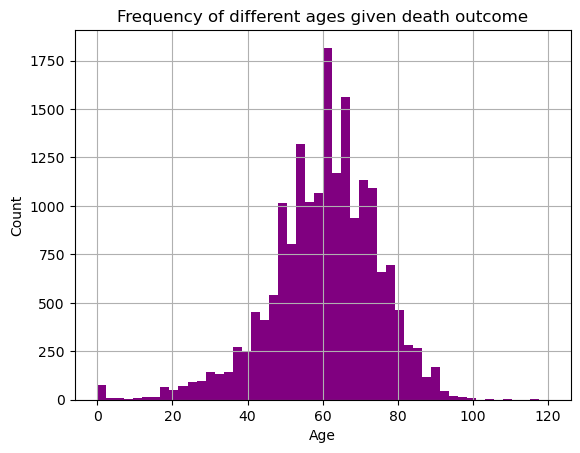

In [301]:
death_df_clean["YEARS"].hist(bins=50, color="purple", range=(0, 120));
plt.xlabel("Age"), plt.ylabel("Count"), plt.title("Frequency of different ages given death outcome")

(Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Frequency of different ages'))

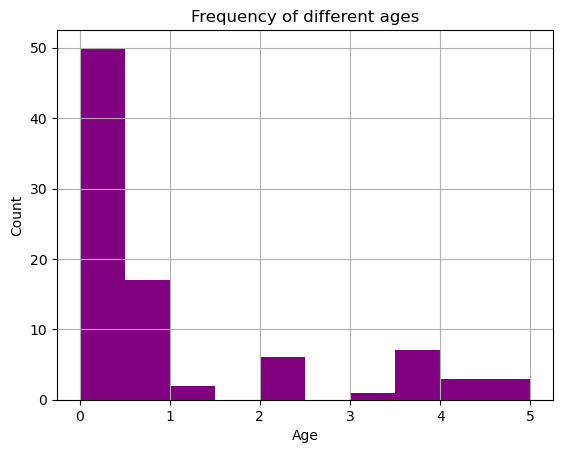

In [96]:
death_df_clean["YEARS"].hist(bins=10, color="purple", range=(0, 5));
plt.xlabel("Age"), plt.ylabel("Count"), plt.title("Frequency of different ages")

In [86]:
death_df_clean.to_csv('datathon_cleaned_dataset.csv', index=False)

In [128]:
df_clean.to_csv('datathon_clean.csv', index=False)

432
36.082816358024694
34.85


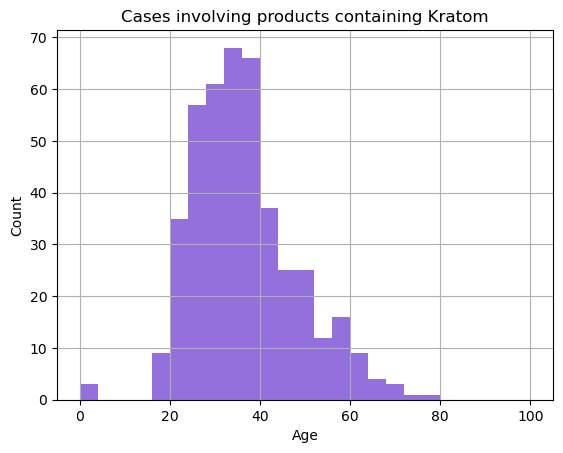

In [290]:
kratom = df_clean[df_clean['PRODUCT'].str.contains('kratom', case = False)]
print(len(kratom))
#value_counts = kratom["PRODUCT"].value_counts()
#value_counts
kratom["YEARS"].hist(bins=25, color="mediumpurple", range=(0, 100));
plt.xlabel("Age"), plt.ylabel("Count"), plt.title("Cases involving products containing Kratom")
fig.set_facecolor('None')
print(kratom["YEARS"].mean())
print(kratom["YEARS"].median())

/var/folders/4v/swx3wyw916s2vd_jqrkpwyl80000gn/T/ipykernel_77119/303470966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/4v/swx3wyw916s2vd_jqrkpwyl80000gn/T/ipykernel_77119/303470966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Case Frequency over Time'))

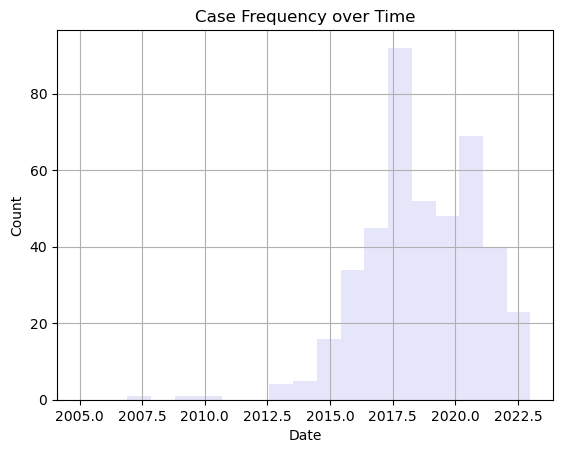

In [296]:
kratom['DATE_EVENT'] = pd.to_datetime(kratom['DATE_EVENT'])
kratom['Year'] = kratom['DATE_EVENT'].dt.year
kratom["Year"].hist(bins=19, color="lavender", range=(2005, 2023));
plt.xlabel("Date"), plt.ylabel("Count"), plt.title("Case Frequency over Time")

In [280]:
test = df_clean[df_clean['DESCRIPTION'].str.contains('cosmetics', case = False)]
print(len(test))
#value_counts = test["PRODUCT"].value_counts()
#value_counts
johnson["PATIENT_AGE"].hist(bins=25, color="cornflowerblue", range=(0, 100));
plt.xlabel("Age"), plt.ylabel("Count"), plt.title("Cases involving Johnson and Johnson products")
fig.set_facecolor('None')


9237


PRODUCT
WEN CLEANSING CONDITIONER                  263
JOHNSONS POWDER NO UPC                     176
MONAT RENEW SHAMPOO                        119
WEN                                        113
EOS LIP BALM                                90
                                          ... 
KIEHL'S ULTRA FACIAL TONER                   1
KIEHL'S POWERFUL WRINKLE REDUCING CREAM      1
THE COLOR WORKSHOP LIPSTICK (LBEAA)          1
MATRIX HAIR DYE                              1
JUST FOR MEN SHAMPOO-IN HAIR COLOR           1
Name: count, Length: 5591, dtype: int64

51.0998623853211
56.0


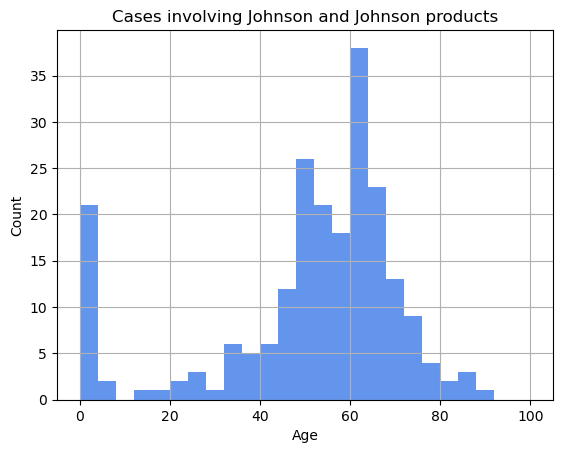

In [289]:
johnson = df_clean[df_clean['PRODUCT'].str.contains('Johnson', case=False)]
johnson["YEARS"].hist(bins=25, color="cornflowerblue", range=(0, 100));
plt.xlabel("Age"), plt.ylabel("Count"), plt.title("Cases involving Johnson and Johnson products")
fig.set_facecolor('None')

print(johnson["PATIENT_AGE"].mean())
print(johnson["PATIENT_AGE"].median())

In [204]:
value_counts = johnson['SEX'].value_counts()
print(value_counts)

#pivot_table_counts = pd.pivot_table(johnson, values=['YEARS', 'SEX'], aggfunc='count')
#pivot_table_counts

age_bins = [0, 6, 19, 35, 50, 100]  # Specify your desired age bins
age_labels = ['0-5', '6-18', '19-35', '36-50', '51+']  # Labels for age groups

johnson['age_group'] = pd.cut(johnson['YEARS'], bins=age_bins, labels=age_labels)

sex_age_counts = johnson.groupby(['SEX', 'age_group']).size().unstack(fill_value=0)

print("\nSex and Age Group Counts:")
print(sex_age_counts)
print(len(johnson))

SEX
Female    200
Male       18
Name: count, dtype: int64

Sex and Age Group Counts:
age_group  0-5  6-18  19-35  36-50  51+
SEX                                    
Female      12     0     12     45  131
Male        11     2      0      1    4
218


/var/folders/4v/swx3wyw916s2vd_jqrkpwyl80000gn/T/ipykernel_77119/4078188308.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/4v/swx3wyw916s2vd_jqrkpwyl80000gn/T/ipykernel_77119/4078188308.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [195]:
split = johnson['CASE_MEDDRA_PREFERRED_TERMS'].str.split(', ').explode()
split = split.str.strip()
split

#df_expanded = johnson['CASE_MEDDRA_PREFERRED_TERMS'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('SPLIT')
#df_expanded = pd.concat([johnson.drop('SPLIT', axis=1), df_expanded], axis=1)
#result_df = pd.concat([johnson.drop('CASE_MEDDRA_PREFERRED_TERMS', axis=1), df_expanded], axis=1)


# Concatenate the new DataFrame with the original DataFrame
#result_df = pd.concat([df.drop('Column1', axis=1), df_expanded], axis=1)
#johnson['CASE_MEDDRA_PREFERRED_TERMS'].nunique()

2843                Ovarian cancer
2844                Ovarian cancer
2845                Ovarian cancer
2847                         Death
2847      Ovarian cancer stage III
                    ...           
201721                    SWELLING
201721                   URTICARIA
203225      ENTEROBACTER INFECTION
203225             HOSPITALISATION
203225                  MENINGITIS
Name: CASE_MEDDRA_PREFERRED_TERMS, Length: 346, dtype: object

In [196]:
replace_dict = {'Ovarian cancer': 'Ovarian Cancer', 'Ovarian cancer stage III': 'Ovarian Cancer', 'Fallopian tube cancer stage III': 'Fallopian tube cancer', 'Ovarian cancer stage II': 'Ovarian Cancer'}
split.replace(replace_dict, inplace=True)
value_counts = split.value_counts()
value_counts


CASE_MEDDRA_PREFERRED_TERMS
Ovarian Cancer                   128
Death                             27
Fallopian tube cancer             23
Endometrial cancer                 8
Malignant peritoneal neoplasm      7
                                ... 
Colon cancer                       1
Vomiting                           1
Food poisoning                     1
Diarrhoea                          1
MENINGITIS                         1
Name: count, Length: 105, dtype: int64

In [209]:
value_counts = johnson["DESCRIPTION"].value_counts()
value_counts

DESCRIPTION
Cosmetics                                 203
Baby Food Products                         12
Vit/Min/Prot/Unconv Diet(Human/Animal)      1
Fishery/Seafood Prod                        1
Food Sweeteners (Nutritive)                 1
Name: count, dtype: int64

/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


TypeError: ylabel() missing 1 required positional argument: 'ylabel'

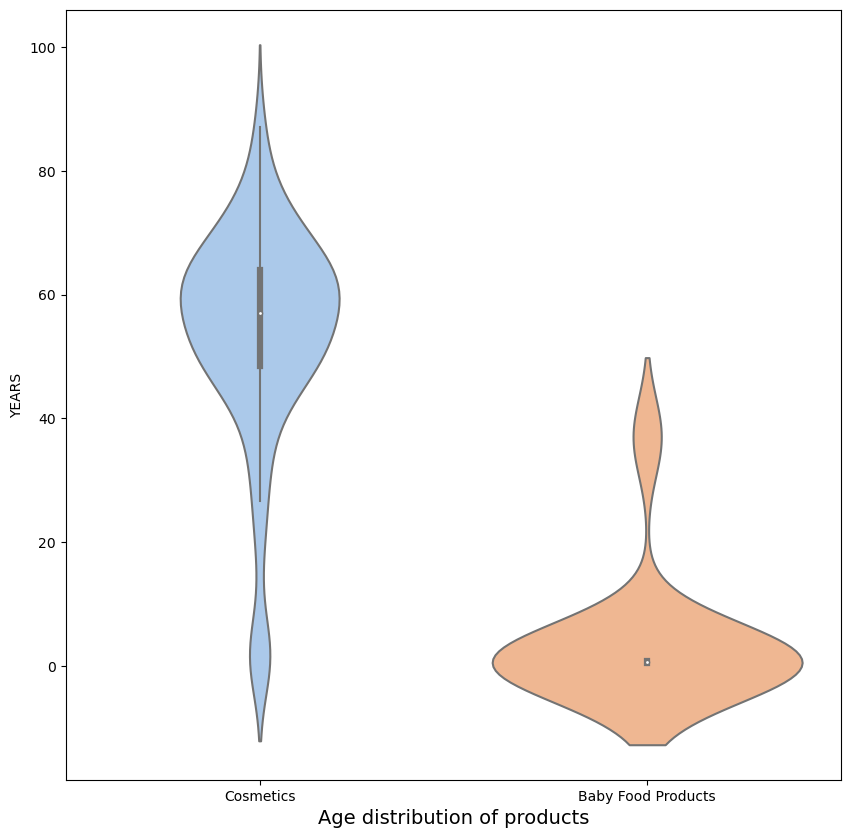

In [298]:
#top = ["Cosmetics", "Baby Food Products"]
#johnson_top = johnson[johnson['DESCRIPTION'] == top]
#print(johnson_top)
#johnson.drop(johnson[johnson['DESCRIPTION'] == 'Vit/Min/Prot/Unconv Diet(Human/Animal)'], inplace=True)

johnson_top = johnson[johnson['DESCRIPTION'] != 'Vit/Min/Prot/Unconv Diet(Human/Animal)']
johnson_top = johnson_top[johnson_top['DESCRIPTION'] != 'Fishery/Seafood Prod']
johnson_top = johnson_top[johnson_top['DESCRIPTION'] != 'Food Sweeteners (Nutritive)']

fig = plt.figure(figsize=(10, 10))
sns.violinplot(x='DESCRIPTION', y='YEARS', data=johnson_top)

plt.xlabel("Age distribution of products", fontsize=14)
plt.ylabel(fontsize=14)
sns.set_palette("pastel")
fig.set_facecolor('None')
# Show the plot
plt.show()

/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/victorialiu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_a

Text(0.5, 1.0, 'Gender Distribution of Programs (2016 - 2017)')

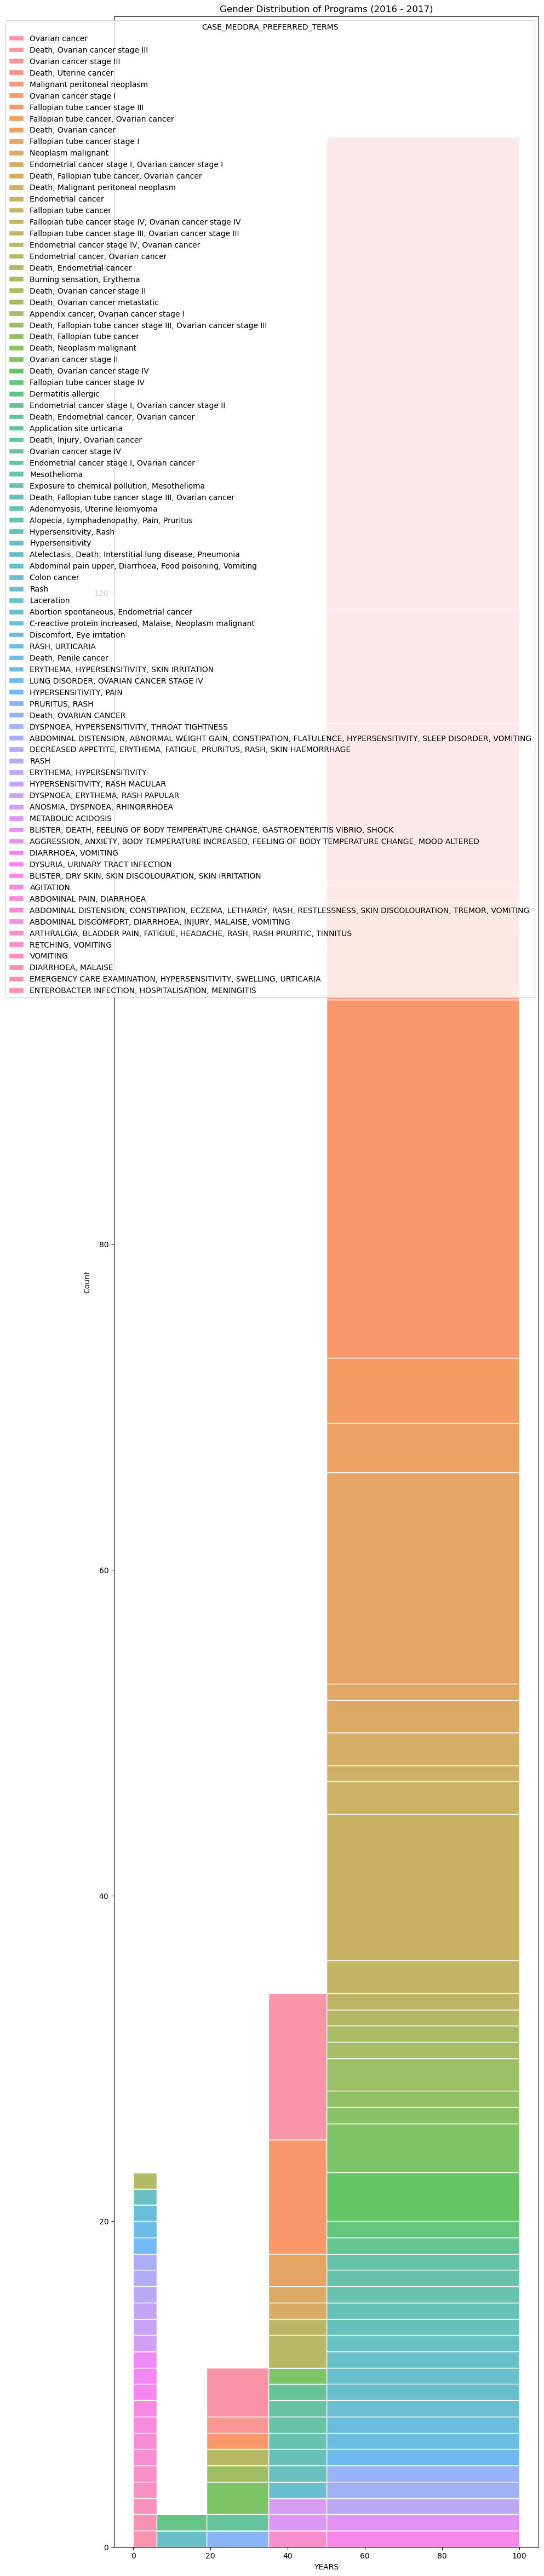

In [157]:
#ignore this
fig = plt.figure(figsize=(10, 60))
sns.histplot(data=johnson, x="YEARS", hue='CASE_MEDDRA_PREFERRED_TERMS', multiple='stack', bins=age_bins, edgecolor='white')
fig.set_facecolor('None')
plt.title("Gender Distribution of Programs (2016 - 2017)")

(Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Case Frequency over Time'))

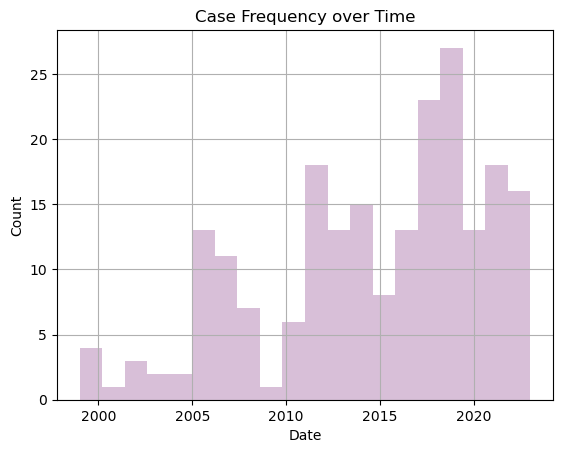

In [302]:
johnson_top['DATE_EVENT'] = pd.to_datetime(johnson_top['DATE_EVENT'])
#johnson_top['MonthYear'] = johnson_top['DATE_EVENT'].dt.to_period('M')
#df['Month'] = df['Date'].dt.month
johnson_top['Year'] = johnson_top['DATE_EVENT'].dt.year
johnson_top["Year"].hist(bins=20, color="thistle", range=(1999, 2023));
plt.xlabel("Date"), plt.ylabel("Count"), plt.title("Case Frequency over Time")